## Import Packages

In [159]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

## Preprocessing

In [160]:
df = pd.read_csv('../data/bank-full.csv')

In [161]:
# encode date data
day_of_week={'wed': 3, 'tue': 2, 'mon': 1, 'fri': 5, 'thu': 4,'sat':6,'sun':7}
month={"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, 
        "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
        "nov": 11, "dec": 12}

df.month = df.month.map(lambda x: month[x])
df.day_of_week = df.day_of_week.map(lambda x: day_of_week[x])

In [162]:
# drop duplicates
subset = ['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'contact','duration']
df[df.duplicated(subset=subset)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1179,44,technician,married,professional.course,unknown,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1326,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1599,31,admin.,married,high.school,no,yes,yes,telephone,5,5,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2573,35,services,married,high.school,no,no,no,telephone,5,2,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40596,32,admin.,single,university.degree,no,yes,no,cellular,9,4,...,2,10,3,success,-1.1,94.199,-37.5,0.884,4963.6,yes
40604,31,admin.,single,high.school,no,no,no,cellular,9,5,...,2,3,2,success,-1.1,94.199,-37.5,0.883,4963.6,yes
40641,36,admin.,married,university.degree,no,yes,no,cellular,9,2,...,1,999,2,failure,-1.1,94.199,-37.5,0.881,4963.6,no
41030,28,admin.,single,university.degree,no,no,no,cellular,10,1,...,1,3,3,success,-1.1,94.601,-49.5,1.032,4963.6,yes


In [163]:
#drop duplicates
df = df.drop_duplicates(subset = subset)

In [164]:
#get dummies binary
df = pd.get_dummies(df,columns = ['contact','subscribed'], drop_first=True)

#get dummies
df = pd.get_dummies(df, drop_first=False)

## Scaling

In [165]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

## Principal Component Analysis (PCA)

In [166]:
pca =  PCA()
pca.fit(df_std)

PCA()

In [167]:
# The attribute shows how much variance is explained by each of the nine features
evr = pca.explained_variance_ratio_

evr_df = pd.DataFrame()
evr_df['column'] = df.columns
evr_df['evr'] = evr

In [168]:
evr_df

,column,evr
0,age,1.101096e-01
1,month,5.630790e-02
2,day_of_week,4.641312e-02
3,duration,4.462340e-02
4,campaign,4.166289e-02
5,pdays,3.848943e-02
6,previous,3.576127e-02
7,emp.var.rate,3.403634e-02
8,cons.price.idx,3.340730e-02
9,cons.conf.idx,3.279957e-02


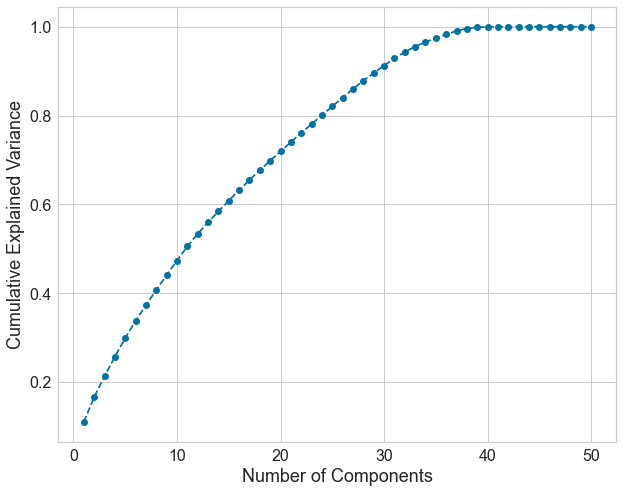

In [169]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(df.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [170]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.9:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(df_std)
scores_pca = pca.transform(df_std)

Number of components: 30


### K-Means

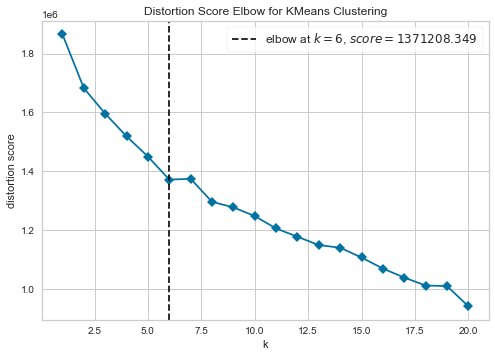

Optimal number of clusters: 6


In [171]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

In [172]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca =  KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 6


In [173]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=6, random_state=42)

### Analysis and Visualization

In [174]:
df_seg_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29,Component 30,Cluster
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,-1.245196,1.147505,1.236108,-1.426712,-0.090849,0.460058,1.207951,1.283235,-1.304211,2
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,-0.606725,1.336645,-0.499411,-0.429159,-0.707208,0.337354,0.125975,0.545970,-0.065897,1
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,-0.469971,1.427449,-0.383790,-0.434895,-0.670465,0.225832,-0.040785,0.401446,0.231725,2
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,1.500020,2.256402,-0.239390,-1.091167,-0.287459,-0.684784,0.846666,0.310493,-0.502229,2
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,-0.464866,1.448986,-0.469719,-0.370296,-0.638350,0.125909,-0.066755,0.482901,-0.060681,2


/Users/nazardrushchak/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



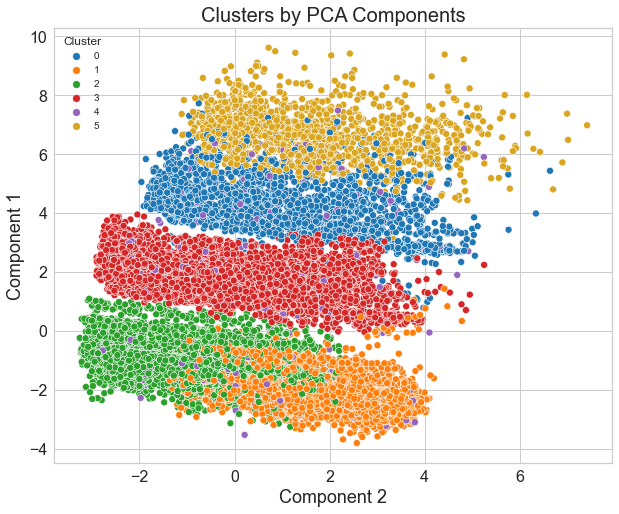

In [175]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [176]:
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Cluster
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,1,0,0,0,1,0,2.0
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,1,0,0,0,1,0,1.0
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,1,1,0,0,0,1,0,2.0
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,1,0,0,0,1,0,2.0
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,0,-1.1,94.767,-50.8,...,0,0,1,1,0,0,0,1,0,NaN
41184,46,11,5,383,1,999,0,-1.1,94.767,-50.8,...,1,0,0,1,0,0,0,1,0,NaN
41185,56,11,5,189,2,999,0,-1.1,94.767,-50.8,...,0,0,1,1,0,0,0,1,0,NaN
41186,44,11,5,442,1,999,0,-1.1,94.767,-50.8,...,1,0,0,1,0,0,0,1,0,NaN


In [177]:
def make_normalized_df(df):
    norm = MinMaxScaler().fit_transform(df)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns)
    return scaled

cluster_labels = df['Cluster']
orig = df.drop(columns=['Cluster'])
values_df = make_normalized_df(orig)
values_df.insert(3, 'cluster', cluster_labels)
values_df.head()

,age,month,day_of_week,cluster,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.222222,0.0,2.0,0.053070,0.0,1.0,0.0,0.9375,0.698753,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.493827,0.222222,0.0,1.0,0.030297,0.0,1.0,0.0,0.9375,0.698753,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,0.222222,0.0,2.0,0.045954,0.0,1.0,0.0,0.9375,0.698753,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.283951,0.222222,0.0,2.0,0.030704,0.0,1.0,0.0,0.9375,0.698753,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.481481,0.222222,0.0,2.0,0.062424,0.0,1.0,0.0,0.9375,0.698753,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [178]:
from turtle import width
import plotly.graph_objects as go


fig = go.Figure()

angles = list(values_df.columns)

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True, 
        width = 800,
        height =800
        )
fig.show()

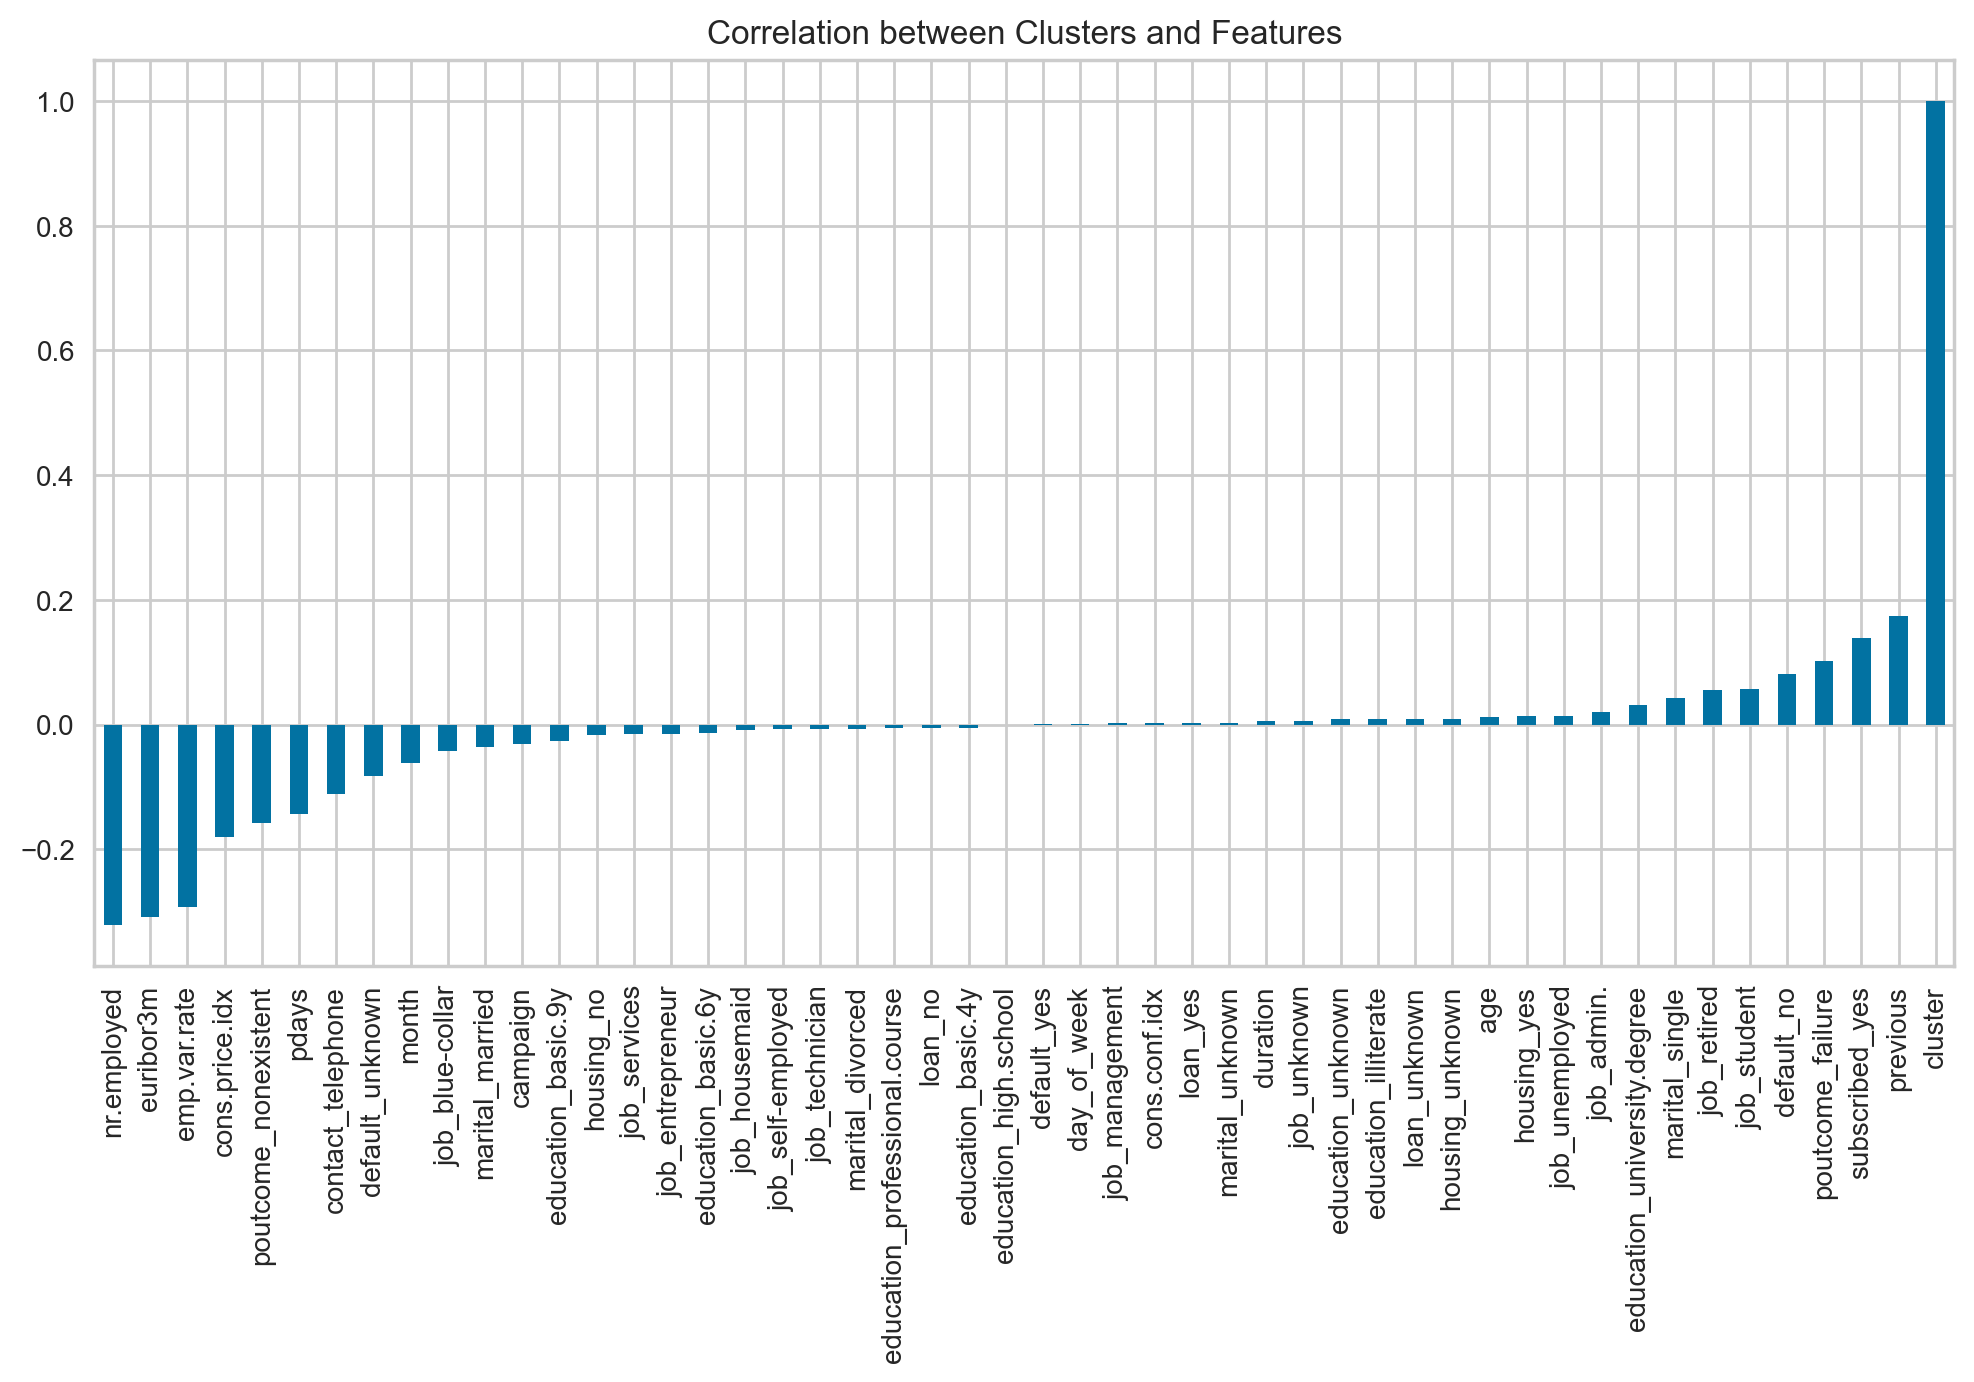

In [179]:
plt.figure(figsize=(12,6),dpi=200)
values_df.corr()["cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

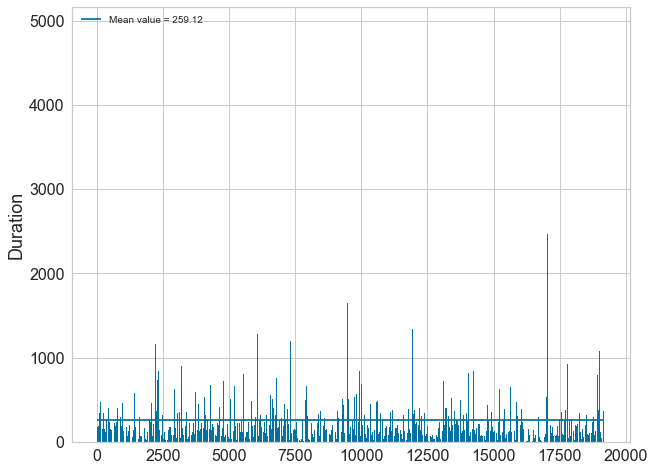

In [180]:
def inspect(df, param, cluster):
    plt.figure(figsize=(10,8))
    test_cluster = df.loc[df['Cluster'] == cluster]
    y = test_cluster[param]
    x = [i for i in range(len(y))]
    plt.bar(x, y)
    plt.ylabel(param.title(), fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.hlines(np.mean(df[param]), 0, len(y), label = f'Mean value = {round(np.mean(df[param]),2)}')
    plt.legend()
    plt.show()
    
inspect(df, "duration", 2)

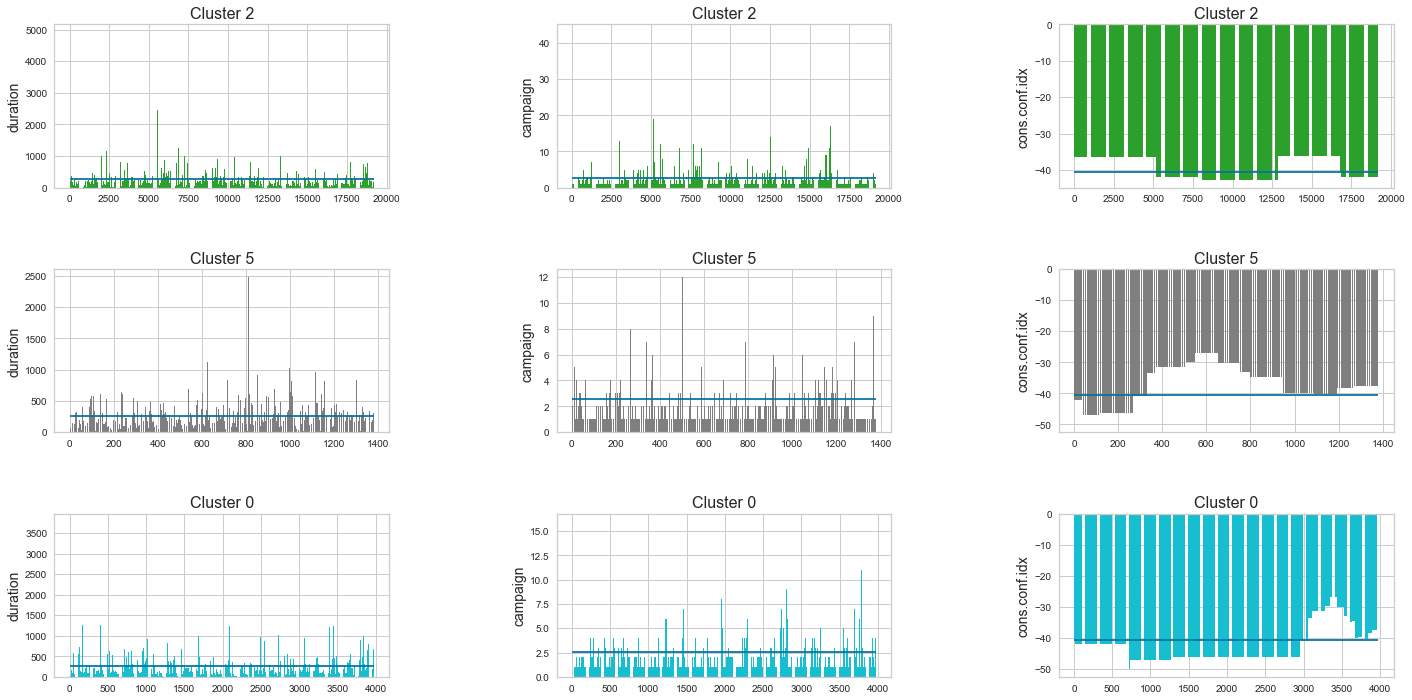

In [181]:
import matplotlib.colors as mcolors
import random 
clusters = [2, 5, 0]
features = ["duration", "campaign", 'cons.conf.idx']
colors = random.choices(list(mcolors.TABLEAU_COLORS.keys()), k=len(clusters))
dim_clusters = len(clusters)
dim_features = len(features)

fig, axes = plt.subplots(dim_clusters, dim_features, figsize=(24, 12))
i = 0
test_cluster = df.loc[df['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim_clusters == 0 and i != 0:
        test_cluster = df.loc[df['Cluster'] == clusters[i // dim_features]]
    col = features[i % dim_features]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim_features])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim_features]), fontsize=16)
    ax.hlines(np.mean(df[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1